In [1]:
%matplotlib inline

# Exercise 5

Actually, if it is raining, I hardly ever bike.  Adjust the model so that there is a 10% chance of rain on any given day, and when it rains, there is a 0.1% chance of me biking (`takes_bike`), but a 20% chance of biking (`takes_bike`) when it isn't raining.  The `pm.Binomial` distribution will be useful, as will theano's `tt.switch` function.

What is the average `total_time` now?

In [2]:
import pymc3 as pm
from sampled import sampled
import theano.tensor as tt

In [3]:
@sampled
def commute():
    train_time = pm.SkewNormal('train_time', mu=40., sd=10., alpha=15.)
    takes_bike = pm.Binomial('takes_bike', n=1, p=0.1)
    bike_time = pm.Normal('bike_time', mu=20., sd=3.)
    walk_time = pm.Normal('walk_time', mu=5., sd=1.)
    t_time = pm.SkewNormal('t_time', mu=15., sd=5., alpha=4.)
    total_time = pm.Normal('total_time', 
                           mu=train_time + tt.switch(takes_bike, bike_time, walk_time+t_time), 
                           sd=1)

In [4]:
@sampled
def rainy_commute():
    is_raining = pm.Binomial('is_raining', n=1, p=0.1)
    train_time = pm.SkewNormal('train_time', mu=40., sd=10., alpha=15.)
    takes_bike = pm.Binomial('takes_bike', n=1, p=tt.switch(is_raining, 0.01, 0.2))
    bike_time = pm.Normal('bike_time', mu=20., sd=3.)
    walk_time = pm.Normal('walk_time', mu=5., sd=1.)
    t_time = pm.SkewNormal('t_time', mu=15., sd=5., alpha=4.)
    total_time = pm.Normal('total_time', 
                           mu=train_time + tt.switch(takes_bike, bike_time, walk_time+t_time), 
                           sd=1)

In [5]:
with rainy_commute():
    trace = pm.sample(2000)

Assigned Metropolis to is_raining
Assigned NUTS to train_time
Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
Assigned NUTS to total_time
100%|██████████| 2500/2500 [00:11<00:00, 210.48it/s]


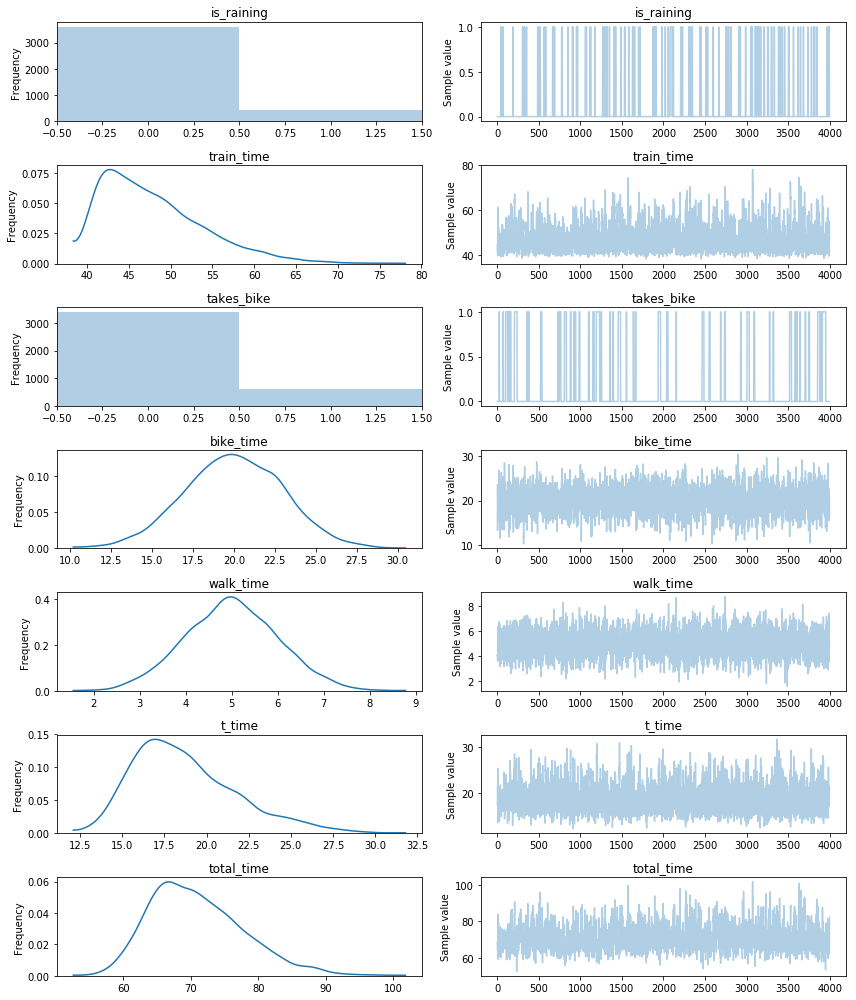

In [6]:
pm.traceplot(trace, combined=True);

In [7]:
trace['total_time'].mean()

71.028109831946381